In [1]:
%%bash
# The following line ensures that cell runs only in Google Colab
!(stat -t /usr/local/lib/*/dist-packages/google/colab > /dev/null 2>&1) && exit 
echo "You are running in colab, getting data"
wget -q https://github.com/paulyurlov/DataVisualization/archive/main.zip
unzip -qq main.zip DataVisualization-main/Data/*
rm -rf Data/ main.zip
cp -r DataVisualization-main/Data/. Data/
rm -rf DataVisualization-main/

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use("ggplot")

# Задание 1

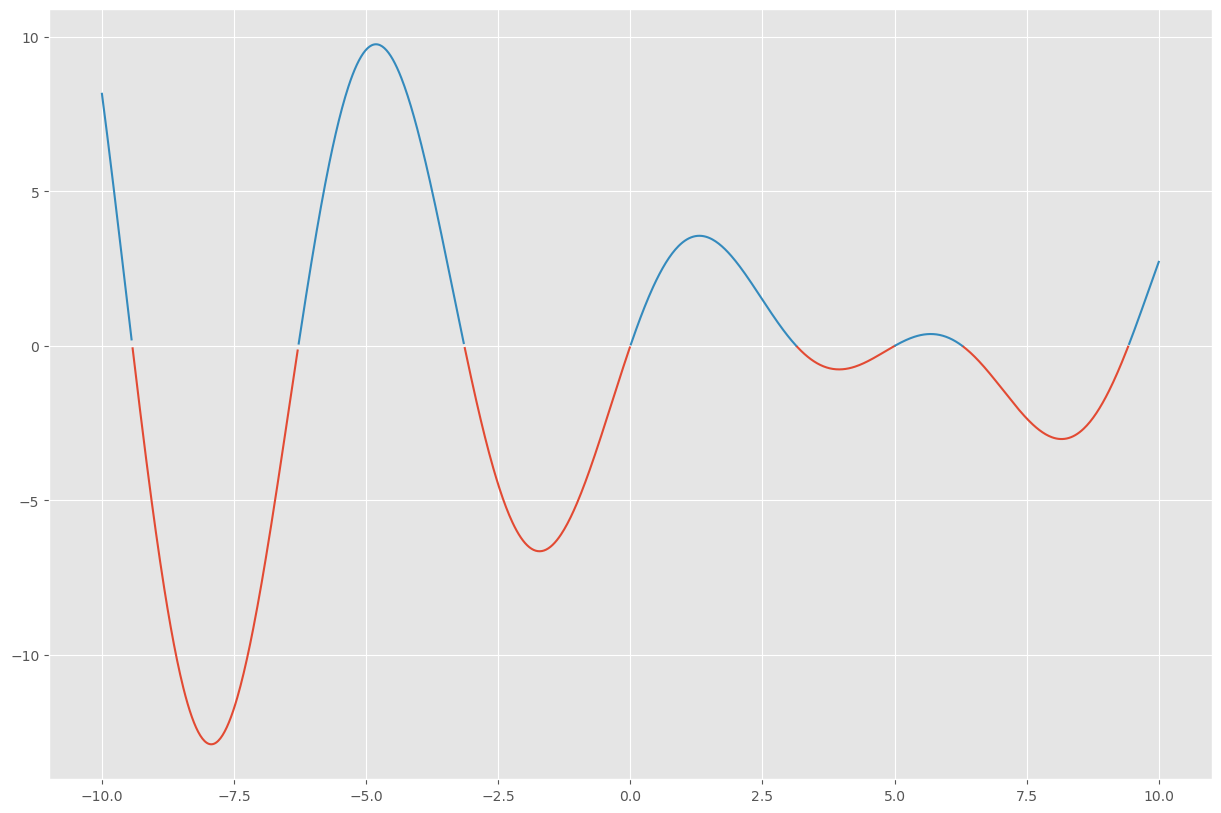

In [3]:
t, step = np.linspace(-10, 10, 1000, retstep=True)
# cmap = ['red'] * len(x[x > 0]) + ['blue'] * len(x[x <= 0])
s = np.sin(t) * (5 - t)

# fig, ax = plt.subplots()

supper = np.ma.masked_where(s <= 0, s)
slower = np.ma.masked_where(s >= 0, s)
plt.figure(figsize=(15, 10))
_ = plt.plot(t, slower, t, supper)
# plt.show()

# Задание 2

In [4]:
df = pd.read_csv('Data/cities.csv')[['LatD', ' "LonD"']].copy()
df.columns = ['LatD', 'LonD']
df.head()

,LatD,LonD
0,41,80
1,42,97
2,46,120
3,42,71
4,43,89


In [5]:
df.shape

(128, 2)

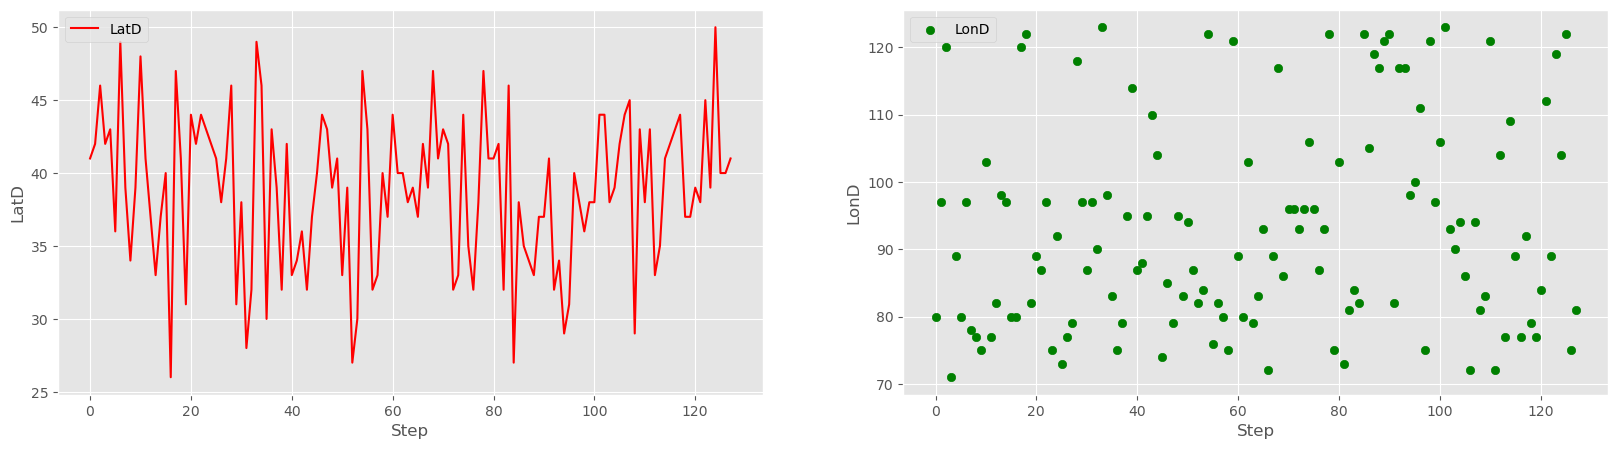

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax[0].plot(df['LatD'], color='red', label='LatD')
ax[1].scatter(np.arange(0, df.shape[0]), df['LonD'], color='green', label='LonD')
ax[0].set_ylabel('LatD', fontsize=12)
ax[1].set_ylabel('LonD', fontsize=12)
ax[0].set_xlabel('Step', fontsize=12)
ax[1].set_xlabel('Step', fontsize=12)
ax[0].legend()
ax[1].legend()
plt.grid(True)
plt.show()

# Задание 3

In [7]:
df = pd.read_csv('Data/sig0001.txt', sep="\t", decimal=',')[['06-08-2019 10:29:48.000 +', 'ZET7156_X (08)', 'ZET7156_Y (09)']].copy()
df.columns = ['time', 'x', 'y']
df.drop(index=0, inplace=True)
df.head()

,time,x,y
1,0,"-0,0363033","-0,0623783"
2,"0,002","-0,0392815","-0,0225807"
3,"0,004","-0,0149861","-0,0427117"
4,"0,006","-0,014932","-0,0767773"
5,"0,008","-0,0258301","-0,060343"


In [8]:
df = df.apply(lambda x: x.str.replace(',','.')).copy()
df = df.astype('float').copy()
df.dtypes

time    float64
x       float64
y       float64
dtype: object

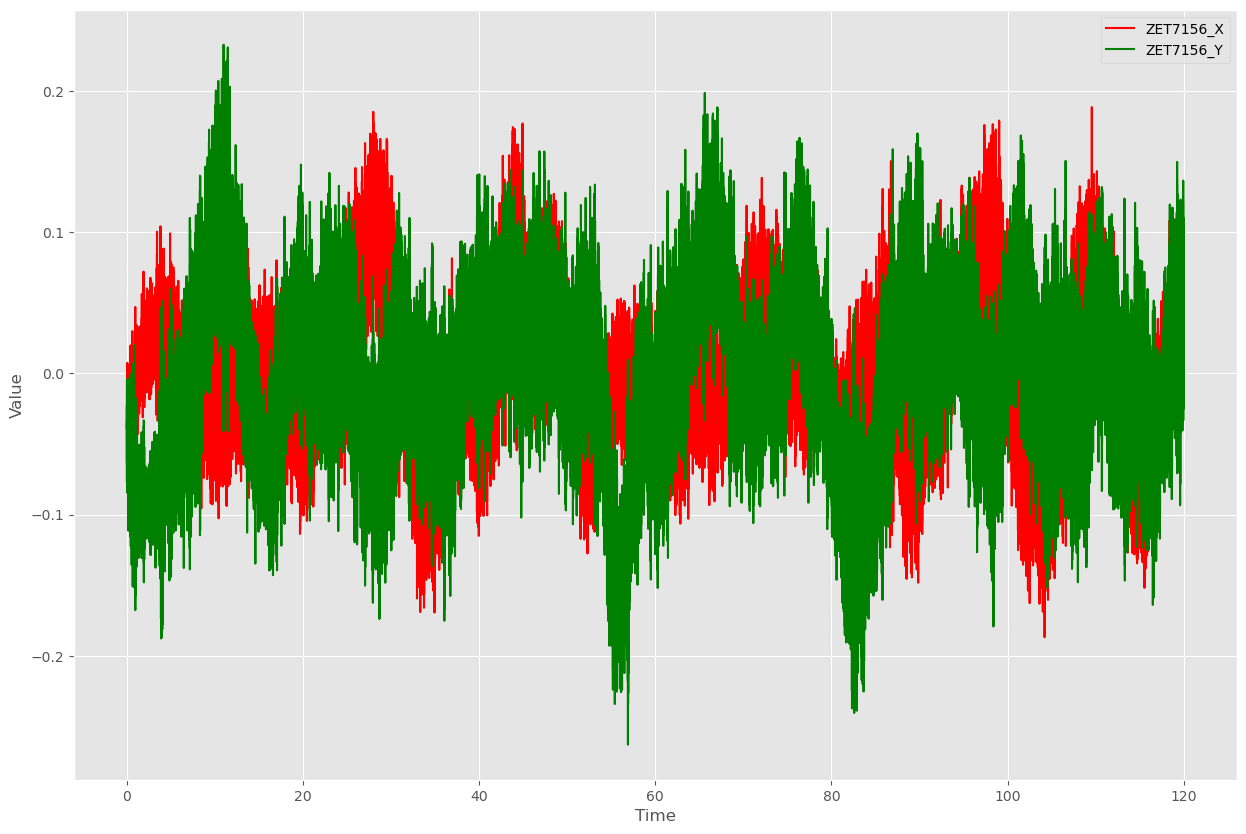

In [9]:
plt.figure(figsize=(15, 10))
plt.plot(df.time, df.x, color='red', label='ZET7156_X')
plt.plot(df.time, df.y, color='green', label='ZET7156_Y')
plt.ylabel('Value', fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()